In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
os.environ['OMP_NUM_THREADS'] = '1'


# Specify the file path
file_path = "Merged_Aneurysm.csv"

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
data


,case_id,patient_id,aneurysmLocation,aneurysmType,ruptureStatus,age,sex,multipleAneurysms,sacVolume,sacSurfaceArea,...,maxPressure,meanPressure,maxSpeed,meanSpeed,minTAWSS,maxTAWSS,meanTAWSS,minOSI,maxOSI,meanOSI
0,C0001,P0085,ICA,LAT,U,53,F,False,125.259604,120.453515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C0002,P0112,ICA,LAT,U,35,F,False,119.002032,122.427263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C0003,P0115,ICA,TER,U,43,F,False,12.740609,23.480617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C0004,P0116,ICA,TER,U,60,F,True,9.376307,18.084625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C0005,P0118,ICA,LAT,R,26,F,False,37.934454,54.844592,...,7665.00,3722.280000,70.275319,13.193760,0.31251,176.440,20.908880,0.0,0.44672,0.001574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,C0095,P0270,BAS,TER,U,43,F,False,76.340708,75.181897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,C0096,P0271,BAS,TER,R,67,M,False,436.828426,260.200509,...,765.53,346.252856,18.308317,3.402625,0.00777,22.004,4.918505,0.0,0.47207,0.011223
100,C0097,P0274,ICA,LAT,R,84,F,False,94.271201,100.528873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,C0098,P0286,MCA,TER,R,59,F,False,1022.481082,466.087643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
print(f'{data.columns}\n {data.shape}')

characteristics = [f'{data.columns}']



Index(['case_id', 'patient_id', 'aneurysmLocation', 'aneurysmType',
       'ruptureStatus', 'age', 'sex', 'multipleAneurysms', 'sacVolume',
       'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea',
       'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis',
       'ellipsoidMinSemiaxis', 'sacCenterlineLength', 'ostiumSectionArea',
       'ostiumSectionPerimeter', 'ostiumMinSize', 'ostiumMaxSize',
       'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star',
       'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'sacMinPressure',
       'sacMaxPressure', 'sacMeanPressure', 'sacMaxSpeed', 'sacMeanSpeed',
       'sacMinTAWSS', 'sacMaxTAWSS', 'sacMeanTAWSS', 'sacMinOSI', 'sacMaxOSI',
       'sacMeanOSI', 'vesselName', 'length', 'meanRadius', 'meanCurvature',
       'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 'maxCurvature',
       'maxTorsion', 'bifurcationAngleInPlane', 'bifurcationAngleOutOfPlane',
       'minPressure', 'maxPressure', '

In [3]:
data.dtypes

case_id              object
patient_id           object
aneurysmLocation     object
aneurysmType         object
ruptureStatus        object
                     ...   
maxTAWSS            float64
meanTAWSS           float64
minOSI              float64
maxOSI              float64
meanOSI             float64
Length: 62, dtype: object

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Specify the file path
file_path = "Merged_Aneurysm.csv"

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Define the list of characteristics to be used including rupture status
characteristics_with_rupture = ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
                                'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 
                                'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 'sacCenterlineLength', 
                                'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
                                'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 
                                'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
                                'meanCurvature', 'meanTorsion', 'tortuosity', 'minRadius', 'maxRadius', 
                                'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
                                'bifurcationAngleOutOfPlane', 'sex', 'multipleAneurysms', 
                                'aneurysmLocation', 'aneurysmType', 'ruptureStatus']

# Filter the data to include only the selected characteristics
data = data[characteristics_with_rupture]

# Convert numeric columns that are of object type to numeric
for col in ['age', 'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 'sacSectionArea', 
            'ellipsoidVolume', 'ellipsoidMaxSemiaxis', 'ellipsoidMidSemiaxis', 'ellipsoidMinSemiaxis', 
            'sacCenterlineLength', 'ostiumSectionArea', 'ostiumSectionPerimeter', 'ostiumMinSize', 
            'ostiumMaxSize', 'ostiumShapeFactor', 'aspectRatio_star', 'sizeRatio_star', 'vesselDiameter', 
            'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 'meanCurvature', 'meanTorsion', 'tortuosity', 
            'minRadius', 'maxRadius', 'maxCurvature', 'maxTorsion', 'bifurcationAngleInPlane', 
            'bifurcationAngleOutOfPlane']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert categorical variables to numeric
for col in ['sex', 'multipleAneurysms', 'aneurysmLocation', 'aneurysmType', 'ruptureStatus']:
    data[col] = data[col].astype('category').cat.codes

# Handle missing values by filling them with a specific placeholder
data.fillna(-1, inplace=True)

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)



For n_clusters = 2, the average silhouette_score is 0.6854908762843417


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

For n_clusters = 3, the average silhouette_score is 0.5359100418596378
For n_clusters = 4, the average silhouette_score is 0.5378168421531726
For n_clusters = 5, the average silhouette_score is 0.4999442171433185
For n_clusters = 6, the average silhouette_score is 0.48000439224797964
For n_clusters = 7, the average silhouette_score is 0.31674935615509586
For n_clusters = 8, the average silhouette_score is 0.3434097174791286


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

For n_clusters = 9, the average silhouette_score is 0.3484512665983928
For n_clusters = 10, the average silhouette_score is 0.3310032714954656


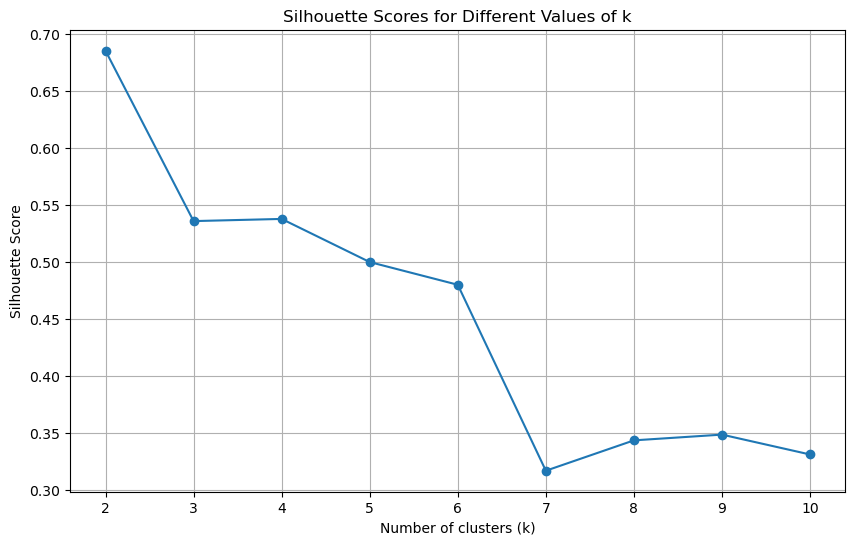

In [5]:
import pandas as pd
import numpy as np


# Define the range of k values to evaluate
k_values = range(2, 11)

# Initialize a list to store silhouette scores
silhouette_scores = []

# Calculate silhouette scores for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the average silhouette_score is {silhouette_avg}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Example parameters to tune
perplexities = [5, 30, 50]
learning_rates = [10, 200, 1000]
n_iters = [250, 500, 1000]

# Store results for comparison
results = []

for p in perplexities:
    for lr in learning_rates:
        for n_iter in n_iters:
            tsne = TSNE(n_components=2, perplexity=p, learning_rate=lr, n_iter=n_iter, random_state=42)
            tsne_results = tsne.fit_transform(scaled_data)
            
            kmeans_tsne = KMeans(n_clusters=2, random_state=42)
            clusters_tsne = kmeans_tsne.fit_predict(tsne_results)
            
            silhouette_tsne = silhouette_score(tsne_results, clusters_tsne)
            
            results.append((p, lr, n_iter, silhouette_tsne))
            print(f'Perplexity: {p}, Learning Rate: {lr}, n_iter: {n_iter}, Silhouette Score: {silhouette_tsne}')

# Find the best parameters
best_params = max(results, key=lambda x: x[3])
print(f'Best parameters: Perplexity: {best_params[0]}, Learning Rate: {best_params[1]}, n_iter: {best_params[2]}, Silhouette Score: {best_params[3]}')


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 5, Learning Rate: 10, n_iter: 250, Silhouette Score: 0.8571164011955261


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 5, Learning Rate: 10, n_iter: 500, Silhouette Score: 0.5797255635261536


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 5, Learning Rate: 10, n_iter: 1000, Silhouette Score: 0.6011251211166382
Perplexity: 5, Learning Rate: 200, n_iter: 250, Silhouette Score: 0.4608520567417145


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 5, Learning Rate: 200, n_iter: 500, Silhouette Score: 0.49385496973991394


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 5, Learning Rate: 200, n_iter: 1000, Silhouette Score: 0.47085511684417725
Perplexity: 5, Learning Rate: 1000, n_iter: 250, Silhouette Score: 0.7166614532470703


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 5, Learning Rate: 1000, n_iter: 500, Silhouette Score: 0.6720711588859558


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 5, Learning Rate: 1000, n_iter: 1000, Silhouette Score: 0.3176049590110779


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 30, Learning Rate: 10, n_iter: 250, Silhouette Score: 0.5371966361999512


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 30, Learning Rate: 10, n_iter: 500, Silhouette Score: 0.5371339917182922


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 30, Learning Rate: 10, n_iter: 1000, Silhouette Score: 0.5380108952522278
Perplexity: 30, Learning Rate: 200, n_iter: 250, Silhouette Score: 0.8178430795669556


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 30, Learning Rate: 200, n_iter: 500, Silhouette Score: 0.5494833588600159


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 30, Learning Rate: 200, n_iter: 1000, Silhouette Score: 0.5433991551399231


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 30, Learning Rate: 1000, n_iter: 250, Silhouette Score: 0.8292056918144226


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 30, Learning Rate: 1000, n_iter: 500, Silhouette Score: 0.8130588531494141


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 30, Learning Rate: 1000, n_iter: 1000, Silhouette Score: 0.807427704334259


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 50, Learning Rate: 10, n_iter: 250, Silhouette Score: 0.5053805112838745


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 50, Learning Rate: 10, n_iter: 500, Silhouette Score: 0.5043721199035645


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 50, Learning Rate: 10, n_iter: 1000, Silhouette Score: 0.5043559074401855
Perplexity: 50, Learning Rate: 200, n_iter: 250, Silhouette Score: 0.36337724328041077


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 50, Learning Rate: 200, n_iter: 500, Silhouette Score: 0.5031205415725708


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 50, Learning Rate: 200, n_iter: 1000, Silhouette Score: 0.503002405166626


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 50, Learning Rate: 1000, n_iter: 250, Silhouette Score: 0.6283420324325562


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Perplexity: 50, Learning Rate: 1000, n_iter: 500, Silhouette Score: 0.31563612818717957
Perplexity: 50, Learning Rate: 1000, n_iter: 1000, Silhouette Score: 0.3477279841899872
Best parameters: Perplexity: 5, Learning Rate: 10, n_iter: 250, Silhouette Score: 0.8571164011955261


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score (t-SNE with Optimal Parameters): 0.8571164011955261


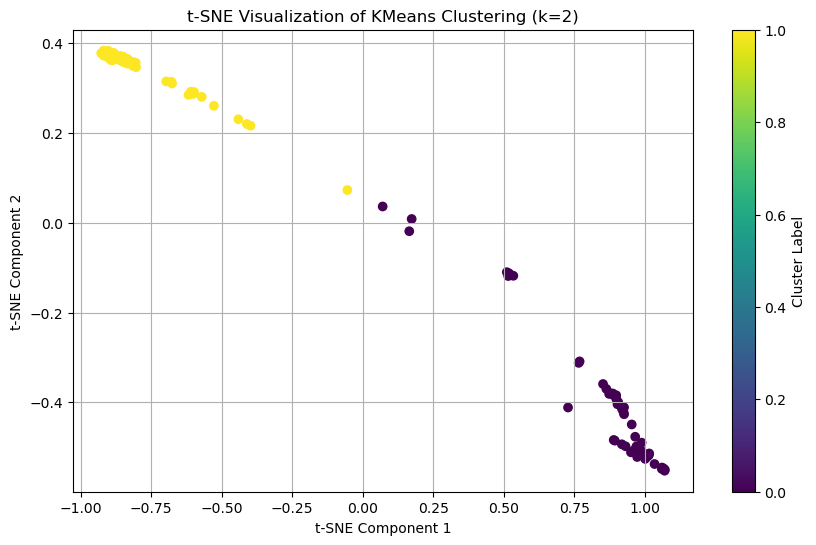

In [7]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Apply t-SNE with optimal parameters
tsne = TSNE(n_components=2, perplexity=5, learning_rate=10, n_iter=250, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Reapply KMeans clustering with the results
kmeans_tsne = KMeans(n_clusters=2, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(tsne_results)

# Compute silhouette score on t-SNE results
silhouette_tsne = silhouette_score(tsne_results, clusters_tsne)
print(f'Silhouette Score (t-SNE with Optimal Parameters): {silhouette_tsne}')

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=clusters_tsne, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of KMeans Clustering (k=2)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


In [8]:
import numpy as np

# Re-run KMeans multiple times
n_runs = 10
stability_scores = []

for _ in range(n_runs):
    clusters_tsne = KMeans(n_clusters=2, random_state=np.random.randint(0, 10000)).fit_predict(tsne_results)
    silhouette_tsne = silhouette_score(tsne_results, clusters_tsne)
    stability_scores.append(silhouette_tsne)

print(f'Stability Scores: {stability_scores}')
print(f'Average Silhouette Score: {np.mean(stability_scores)}')
print(f'Standard Deviation of Silhouette Scores: {np.std(stability_scores)}')


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Stability Scores: [0.8571164, 0.8561941, 0.8561941, 0.8571164, 0.8561941, 0.8561941, 0.8571164, 0.8561941, 0.8571164, 0.8571164]
Average Silhouette Score: 0.8566552400588989
Standard Deviation of Silhouette Scores: 0.00046116113662719727


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
import pandas as pd

# Add cluster labels to the original data
data['Cluster'] = clusters_tsne

# Calculate descriptive statistics
descriptive_stats = data.groupby('Cluster').agg(['mean', 'std', 'min', 'max'])
print(descriptive_stats)


               age                      sacVolume                        \
              mean        std min max        mean         std       min   
Cluster                                                                   
0        56.285714  13.803683  26  85  310.160011  355.589789  9.376307   
1        53.018519  13.699595  24  77  114.778485  131.195163  2.339496   

                     sacSurfaceArea              ... aneurysmLocation      \
                 max           mean         std  ...              min max   
Cluster                                          ...                        
0        1312.025948     193.889729  160.520900  ...                1   3   
1         512.888418     100.680921   82.587468  ...                0   3   

        aneurysmType                  ruptureStatus                    
                mean      std min max          mean       std min max  
Cluster                                                                
0           0.183673  

In [11]:
from scipy import stats
features = characteristics_with_rupture
# Initialize dictionaries to store test results
t_test_results = {}
mann_whitney_results = {}

for feature in features:
    cluster_0 = data[data['Cluster'] == 0][feature]
    cluster_1 = data[data['Cluster'] == 1][feature]

    # Check normality with Shapiro-Wilk test
    _, p_value_shapiro_0 = stats.shapiro(cluster_0)
    _, p_value_shapiro_1 = stats.shapiro(cluster_1)

    # Perform t-test or Mann-Whitney U test based on normality
    if p_value_shapiro_0 > 0.05 and p_value_shapiro_1 > 0.05:
        t_stat, p_value = stats.ttest_ind(cluster_0, cluster_1)
        t_test_results[feature] = p_value
    else:
        u_stat, p_value = stats.mannwhitneyu(cluster_0, cluster_1)
        mann_whitney_results[feature] = p_value

# Print results
print("T-Test Results:")
for feature, p_value in t_test_results.items():
    print(f'{feature}: p-value = {p_value}')

print("\nMann-Whitney U Test Results:")
for feature, p_value in mann_whitney_results.items():
    print(f'{feature}: p-value = {p_value}')


T-Test Results:
age: p-value = 0.23124499152068165
meanRadius: p-value = 3.576265164006428e-29
minRadius: p-value = 8.490809169196615e-11
maxRadius: p-value = 2.240111542188672e-32

Mann-Whitney U Test Results:
sacVolume: p-value = 0.0003765090218446502
sacSurfaceArea: p-value = 0.0004484447799413272
vdcVolume: p-value = 0.00021449507366039382
vdcSurfaceArea: p-value = 0.00023795303007904166
sacSectionArea: p-value = 0.0014746790582983887
ellipsoidVolume: p-value = 0.00019321402818219113
ellipsoidMaxSemiaxis: p-value = 0.0010187855082742089
ellipsoidMidSemiaxis: p-value = 0.00015237901340350805
ellipsoidMinSemiaxis: p-value = 0.0004484285282973795
sacCenterlineLength: p-value = 0.0004161723785708603
ostiumSectionArea: p-value = 0.0025182905606418618
ostiumSectionPerimeter: p-value = 0.004201153766731261
ostiumMinSize: p-value = 0.0008845044698246562
ostiumMaxSize: p-value = 0.005833577040051805
ostiumShapeFactor: p-value = 0.052605058995404255
aspectRatio_star: p-value = 0.350094664946

c:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


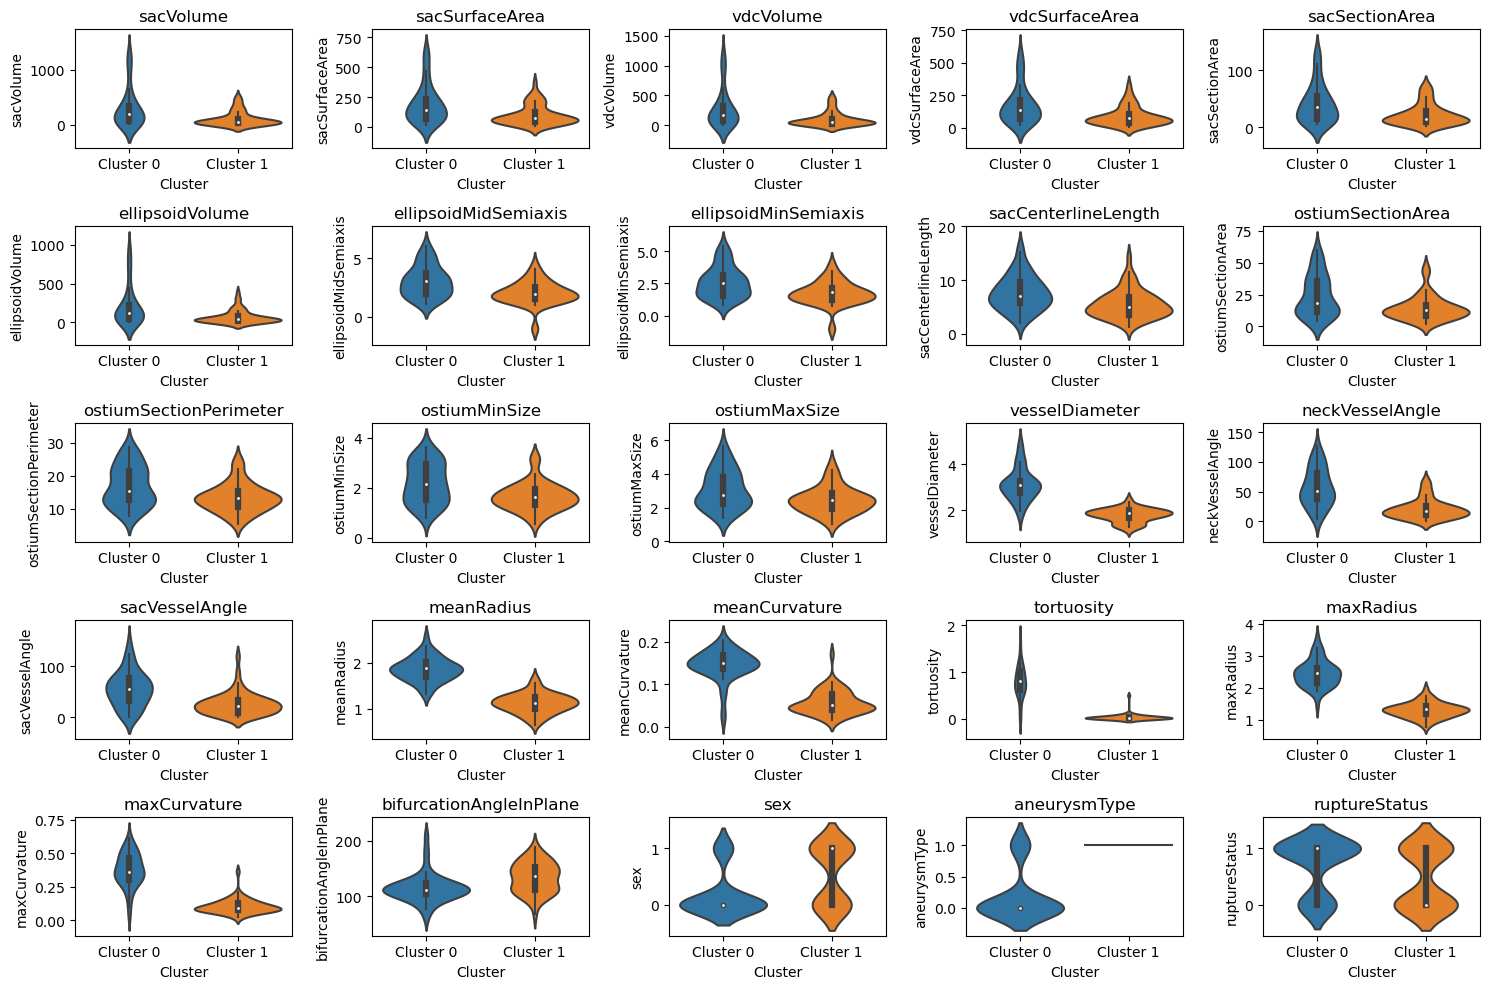

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features with significant differences based on p-values
significant_features = [
    'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'vdcSurfaceArea', 
    'sacSectionArea', 'ellipsoidVolume', 'ellipsoidMidSemiaxis', 
    'ellipsoidMinSemiaxis', 'sacCenterlineLength', 'ostiumSectionArea', 
    'ostiumSectionPerimeter', 'ostiumMinSize', 'ostiumMaxSize', 
    'vesselDiameter', 'neckVesselAngle', 'sacVesselAngle', 'meanRadius', 
    'meanCurvature', 'tortuosity', 'maxRadius', 'maxCurvature', 
    'bifurcationAngleInPlane', 'sex', 'aneurysmType', 'ruptureStatus'
]

plt.figure(figsize=(15, 10))

# Plot each feature
for i, feature in enumerate(significant_features):
    plt.subplot(5, 5, i + 1)
    sns.violinplot(x='Cluster', y=feature, data=data)
    plt.title(feature)
    plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])

plt.tight_layout()
plt.show()

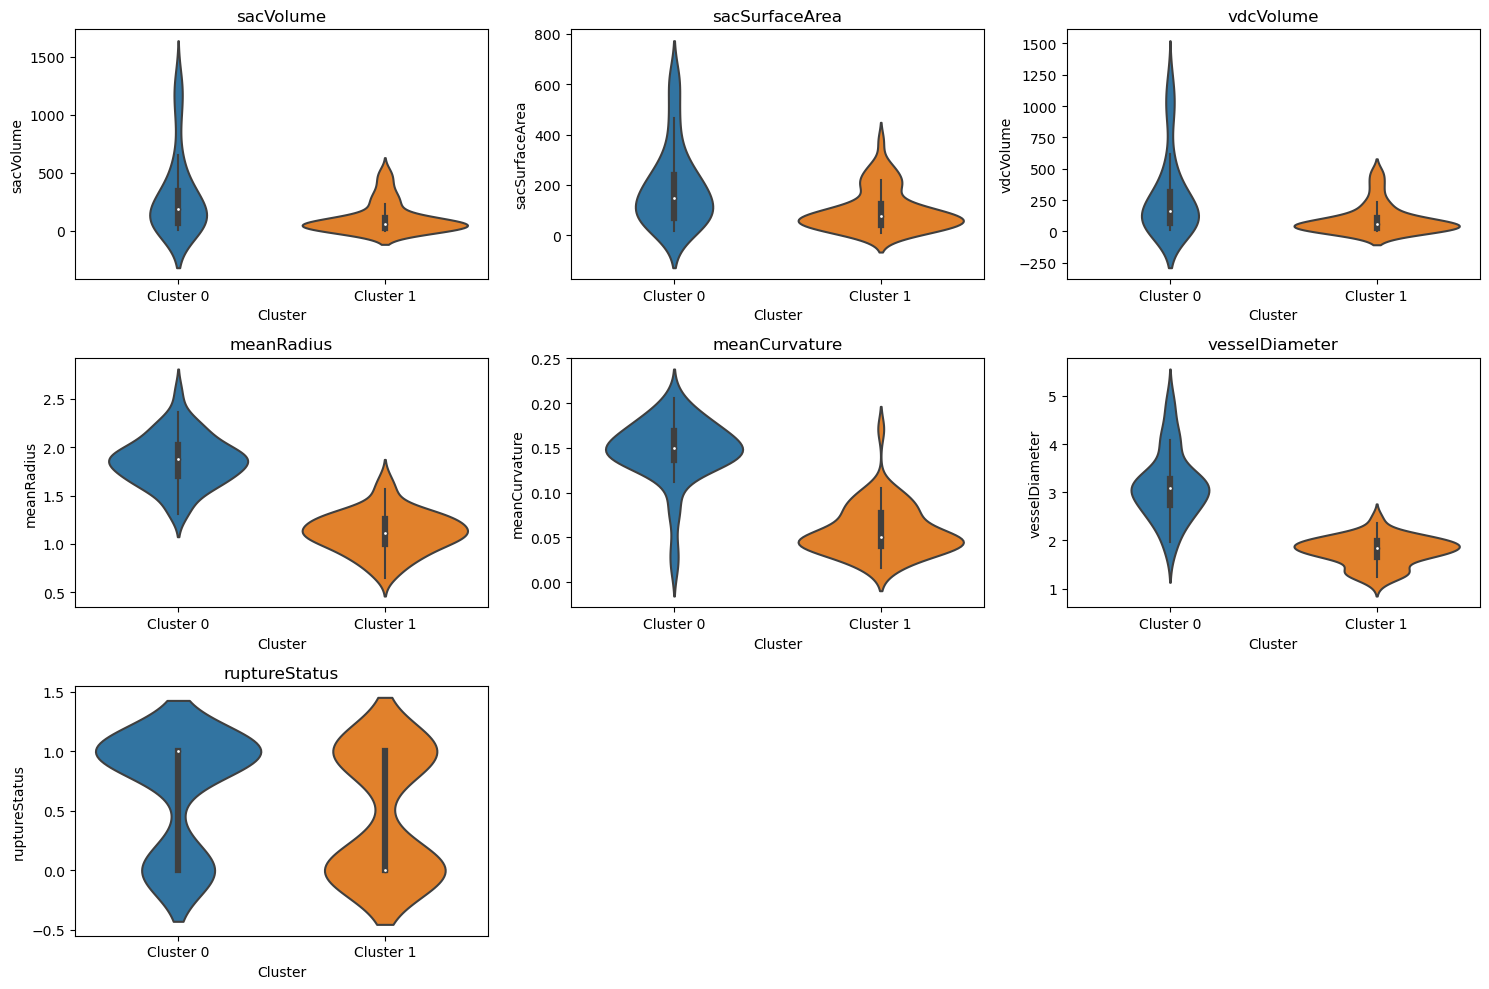

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset of significant features for visualization
subset_features = [
    'sacVolume', 'sacSurfaceArea', 'vdcVolume', 'meanRadius', 
    'meanCurvature', 'vesselDiameter', 'ruptureStatus'
]

plt.figure(figsize=(15, 10))

# Plot each feature in the subset
for i, feature in enumerate(subset_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x='Cluster', y=feature, data=data)
    plt.title(feature)
    plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])

plt.tight_layout()
plt.show()
